In [55]:
import numpy as np
import pandas as pd

# Import the 60min datasets
apple_60min_term_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData/apple_60min_term_df_reduced.csv')
apple_60min_bigram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData/apple_60min_bigram_df_reduced.csv')

In [56]:
# Term training data and labels
X_train_term = apple_60min_term_training.iloc[:, :-1].values
y_train_term = apple_60min_term_training.iloc[:, -1].values

# Bigram training data and labels
X_train_bigram = apple_60min_bigram_training.iloc[:, :-1].values
y_train_bigram = apple_60min_bigram_training.iloc[:, -1].values

print(X_train_bigram.shape)
print(X_train_term.shape)

(7020, 60)
(7020, 20)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Average accuracy: 0.718 (+- 0.019)


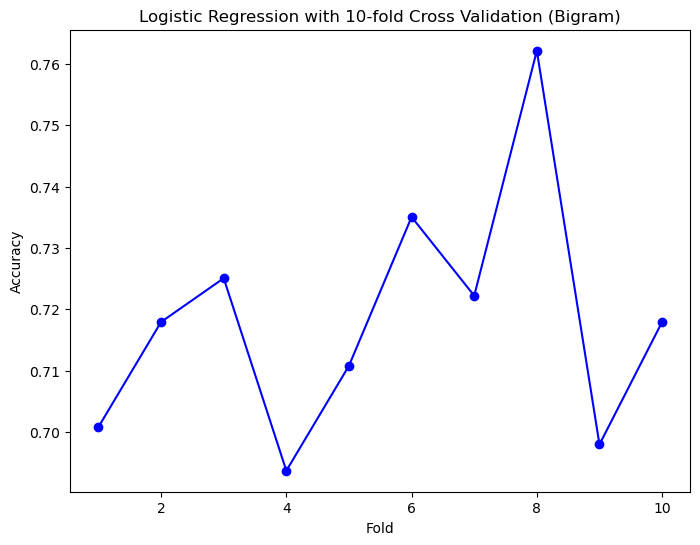

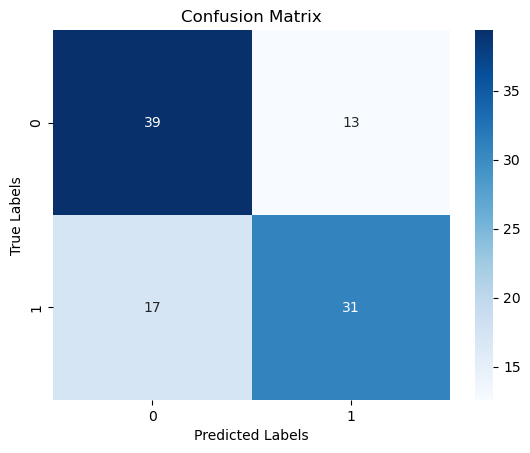

In [58]:
# model for bigram
# Fit your model to the training data
k = 10
cv = KFold(n_splits=k, random_state=1, shuffle=True)
# create model
modelBigram = LogisticRegression()
# evaluate model
scores = cross_val_score(modelBigram, X_train_bigram, y_train_bigram, scoring='accuracy', cv=cv)
# report performance
print('Average accuracy: %.3f (+- %.3f)' % (np.mean(scores), np.std(scores)))
# data viz for accuracy
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, k+1), scores, '-o', color='blue')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression with {}-fold Cross Validation (Bigram)'.format(k))
plt.show()

# data viz for f1 matrix
y_pred = cross_val_predict(modelBigram, X_train_bigram, y_train_bigram, cv=k)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_train_bigram, y_pred)
conf_matrix_percent = np.round(conf_matrix / np.sum(conf_matrix) * 100, decimals=2)
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_percent, annot=True, cmap='Blues')
plt.title('Confusion Matrix (Bigram)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Average accuracy: 0.560 (+- 0.023)


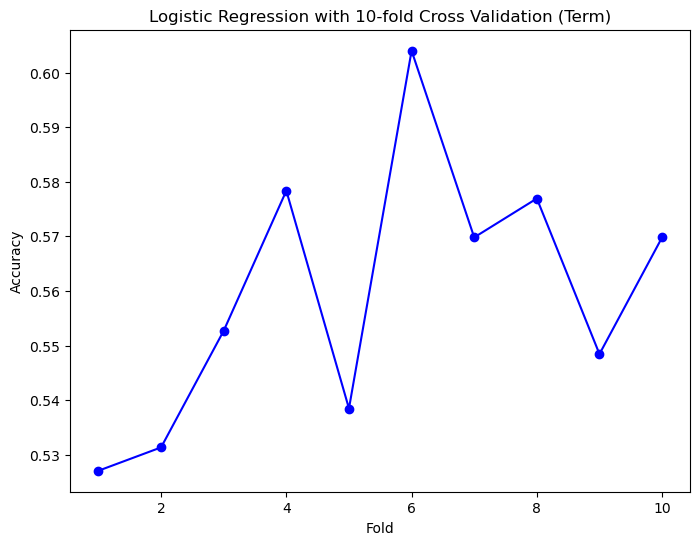

In [59]:
# model for term
# Fit your model to the training data
# LRbigram.fit(X_train_bigram, y_train_bigram)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
modelTerm = LogisticRegression()
# evaluate model
scores = cross_val_score(modelTerm, X_train_term, y_train_term, scoring='accuracy', cv=cv)
# report performance
print('Average accuracy: %.3f (+- %.3f)' % (np.mean(scores), np.std(scores)))
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, k+1), scores, '-o', color='blue')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression with {}-fold Cross Validation (Term)'.format(k))
plt.show()

# data viz for f1 matrix
scores = cross_val_score(modelTerm, X_train_term, y_train_term, scoring='accuracy', cv=cv)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_train_bigram, y_pred)
conf_matrix_percent = np.round(conf_matrix / np.sum(conf_matrix) * 100, decimals=2)
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_percent, annot=True, cmap='Blues')
plt.title('Confusion Matrix (Bigram)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [60]:
# truncate term_df into 60 and run model again
# from sklearn.decomposition import TruncatedSVD

# term_df = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/DTM/apple_bigram_dtm.csv')

# svd_term = TruncatedSVD(n_components=10, random_state=42)
# reduced_term_df = svd_term.fit_transform(term_df)

# reduced_term_df = pd.DataFrame(reduced_term_df)
# reduced_term_df['label'] = term_df['direction']

# reduced_term_df.head()

In [61]:
# X_train_term60 = reduced_term_df.iloc[:, :-1].values
# y_train_term60 = reduced_term_df.iloc[:, -1].values

# cv = KFold(n_splits=10, random_state=1, shuffle=True)
# # create model
# modelTerm60 = LogisticRegression()
# # evaluate model
# scores = cross_val_score(modelTerm60, X_train_term, y_train_term, scoring='accuracy', cv=cv, verbose = 10)
# # report performance
# print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))